In [1]:
import numpy as np
import pylab as plt
import scipy.stats

from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.model_selection import GridSearchCV

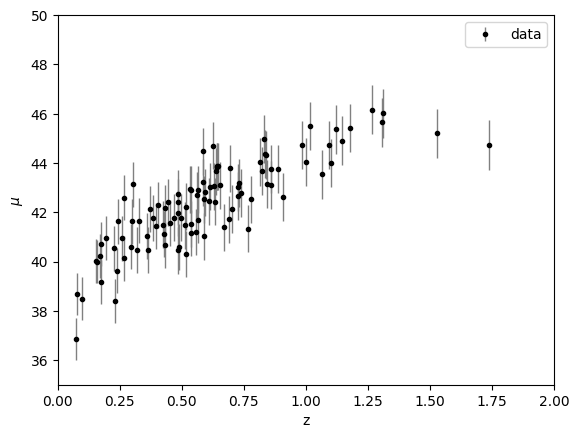

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend()
plt.show()

In [3]:
x = z_sample[:,np.newaxis]
y = mu_sample[:,np.newaxis]
dy = dmu[:,np.newaxis]

## GPR

In [4]:
kernel = 1.0 * kernels.RBF(1.0)
GPR = GaussianProcessRegressor(kernel=kernel, alpha=dmu ** 2, random_state=42)
GPR.fit(x, y)

x_grid = np.linspace(0, 2, 200)
f, f_err = GPR.predict(x_grid[:,np.newaxis], return_std=True)

print("Optimized kernel:", GPR.kernel_)
print("Amplitude:", np.exp(GPR.kernel_.theta[0]))      # associated to const kernel (vertical scale of the function) 
print("Length scale:", np.exp(GPR.kernel_.theta[1]))   # associated to RBF kernel (horizontal scale)

Optimized kernel: 30.7**2 * RBF(length_scale=3.9)
Amplitude: 941.4309603667124
Length scale: 3.8984532691993166


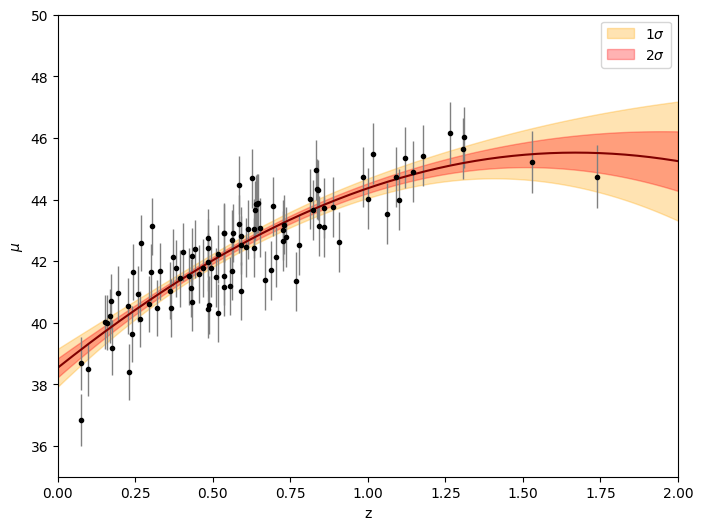

In [5]:
plt.figure(figsize=(8,6))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.plot(x_grid,f, color='maroon')
plt.fill_between(x_grid, f - 2 * f_err, f + 2 * f_err, color='orange', alpha=0.3, label=r'1$\sigma$')
plt.fill_between(x_grid, f - 1 * f_err, f + 1 * f_err, color='red', alpha=0.3, label=r'2$\sigma$')

plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(loc='best')
plt.show()

In order to 

In [6]:
kernel = 1.0 * kernels.RBF(1.0)

GPR = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Define parameter grid
param_grid = {
    "kernel__k1__constant_value": np.logspace(-3, 3, 10),          # Amplitude
    "kernel__k1__constant_value_bounds": [(1e-3, 1e3)],
    "kernel__k2__length_scale": np.logspace(-2, 2, 10),          # Length Scale
    "kernel__k2__length_scale_bounds": [(1e-2, 1e2)],
    "alpha": [1e-2, 1e-1, 1, 10]
}

grid_search = GridSearchCV(GPR, param_grid, cv=5)

grid_search.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a bet

GridSearchCV(cv=5,
             estimator=GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                                                random_state=42),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'kernel__k1__constant_value': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'kernel__k1__constant_value_bounds': [(0.001, 1000.0)],
                         'kernel__k2__length_scale': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'kernel__k2__length_scale_bounds': [(0.01, 100.0)]})

In [9]:
print("Best Parameters:", grid_search.best_params_)
print("Best Kernel:", grid_search.best_estimator_.kernel_)
print("Best Score:", grid_search.best_score_)
#print("Scorer:", grid_search.scorer_)

Best Parameters: {'alpha': 0.1, 'kernel__k1__constant_value': 10.0, 'kernel__k1__constant_value_bounds': (0.001, 1000.0), 'kernel__k2__length_scale': 0.21544346900318834, 'kernel__k2__length_scale_bounds': (0.01, 100.0)}
Best Kernel: 31.2**2 * RBF(length_scale=4.04)
Best Score: 0.7036620250132506


# <span style="color:red"> !!! Finire esercizio (fit MCMC and cloning) !!! </span> 